<a href="https://colab.research.google.com/github/akhundMurad/MachineLearning/blob/main/practice/ReutersCategoricalClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters News Categorical Classifier

## 1. Preparation.

#### 1.1 Prepare dataset.

In [25]:
from tensorflow.keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()  # Word to index
reversed_word_index = {index: word for word, index in word_index.items()}  # Index to word

#### 1.2 Vectorize train and test data.

In [26]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 1.3 One-hot encoding.

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros(shape=(len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)  # tensorflow.keras.utils.to_categorical
one_hot_test_labels = to_one_hot(test_labels)  # tensorflow.keras.utils.to_categorical

## 2. Build model structure.

#### 2.1 Define the model.

In [69]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

#### 2.2 Compilation.

In [70]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

## 3. Model validation.

#### 3.1 Create validation data.

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### 3.2 Model training.

In [71]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 2s 37ms/step - loss: 2.8169 - accuracy: 0.4838 - val_loss: 1.8649 - val_accuracy: 0.6220
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.5535 - accuracy: 0.6853 - val_loss: 1.3817 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.1820 - accuracy: 0.7464 - val_loss: 1.1983 - val_accuracy: 0.7290
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.9666 - accuracy: 0.7940 - val_loss: 1.0951 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8025 - accuracy: 0.8286 - val_loss: 1.0148 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 27ms/step - loss: 0.6683 - accuracy: 0.8592 - val_loss: 0.9490 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5574 - accuracy: 0.8826 - val_loss: 0.9298 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

#### 3.3 Training visualization.

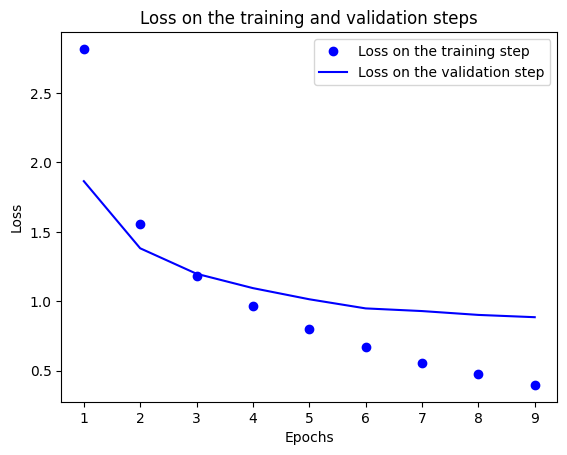

In [72]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Loss on the training step")
plt.plot(epochs, val_loss, "b", label="Loss on the validation step")
plt.title("Loss on the training and validation steps")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

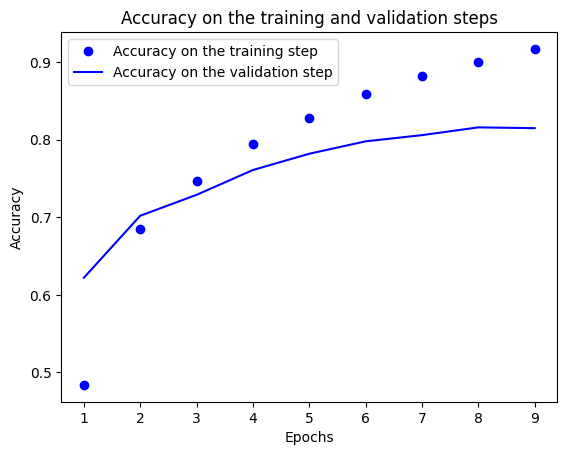

In [73]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Accuracy on the training step")
plt.plot(epochs, val_acc, "b", label="Accuracy on the validation step")
plt.title("Accuracy on the training and validation steps")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()